## Predict Stock Prices using Python and Machine Learning

### Data Collection

### Dataset overview 

This dataset provides the historical amazon stock prices. I'm using quandl for collecting the amazon history stock price. I will start by stating what I want this program to do. I want this program to predict the prices of a stock 30 days in the future based off of the current Adjusted Close price. 

 

Rows: 5248 

Columns: 12 

Null values: 0 

I'm using quandl for collecting the amazon history stock price. I will start by stating what I want this program to do. I want this program to predict the prices of a stock 30 days in the future based off of the current Adjusted Close price. Here, I'm going to use Supervised Machine Learning Algorithms for predicting stock prices i.e., Support Vector Machine and Linear Regression Algorithms.

In [1]:
# import required packages
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
%matplotlib inline

Next I will get the stock data from quandl, and take a look at the dataset. Here, I'm getting Amazon stock data and storing it in a variable called 'df' which is 'Dataframe'.

In [2]:
# Get the stock data
df = quandl.get("WIKI/AMZN")
# Take a look at the data
print(df.head())

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.437500   1.

Now, we have the data. So, lets see the columns and null values and further study about the data.

In [3]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

Now, We discuss about the columns present in the data.
The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High, Low represent the maximum, minimum of the share for the day.
Dividend is the payment made in the form of additional shares rather than a cash payout
Adj. Open,  Adj, High,  Adj. Low,  Adj, Close shows the stock's value after posting a dividend
|Volume and adj volume is the number of shares or contracts traded in a security and after dividend respectively.

### Data cleaning 
Now we need to check for null values in the dataset and clean it


In [4]:
# Lets see the shape of the dataset
df.shape


(5248, 12)

In [5]:
# Check the null values
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

Looks like our dataset doesn't have any null values. So, lets continue with our project.

### Visualization


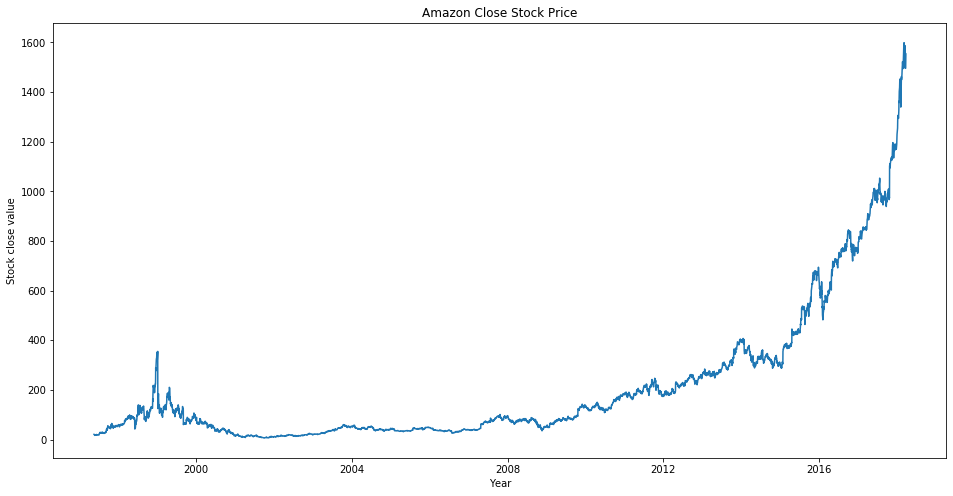

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df.Close)
plt.xlabel('Year')
plt.ylabel('Stock close value')
plt.title("Amazon Close Stock Price")
plt.show()

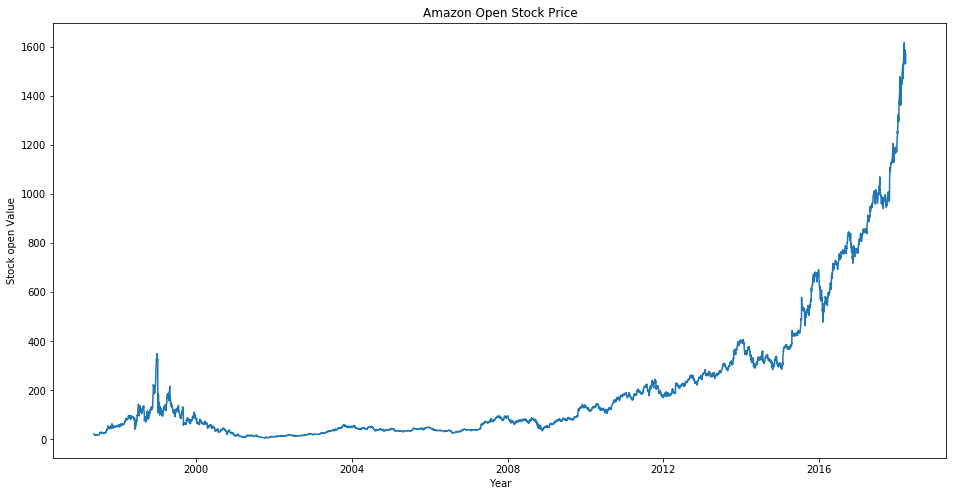

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df.Open)
plt.xlabel('Year')
plt.ylabel('Stock open Value')
plt.title("Amazon Open Stock Price")
plt.show()

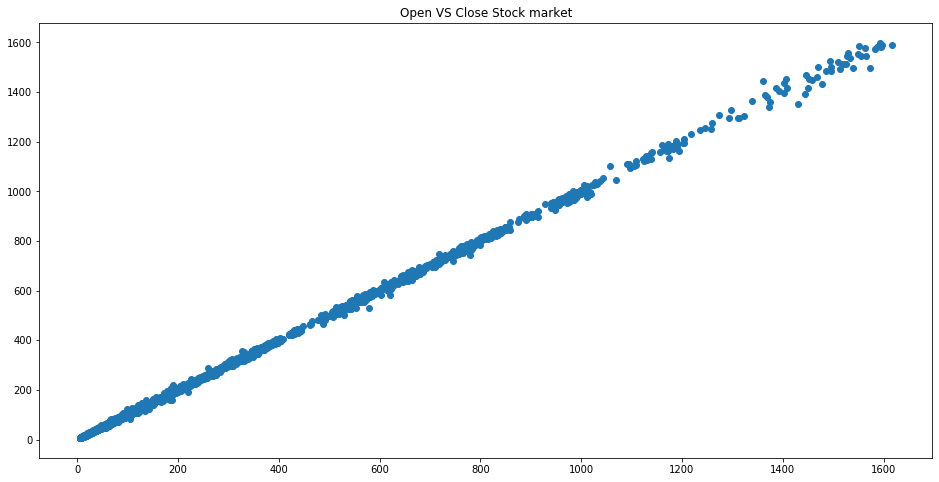

In [9]:
plt.figure(figsize=(16,8))
plt.scatter(df.Open, df.Close)

plt.title("Open VS Close Stock market")
plt.show()

#### We need only Adjusted close price, so we are storing only adj. close value in 'df'

In [10]:
# Get the Adjusted Close Price 
df = df[['Adj. Close']] 
# Take a look at the new data 
print(df.head())

            Adj. Close
Date                  
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635833
1997-05-21    1.427500
1997-05-22    1.395833


Now, we need number of days to be predicted in the future. So, I'm going to create a variable called 'n_forecast' to store the number of days (30 days) into the future that I want to predict.. So if I decide I only want to look 20 days into the future, I can simply change this variable from 30 to 20, and the program will predict now 20 days into the future.

We need a dependent or target variable that will hold the predicted price values 30 days into the future. The future price that I want that’s 30 days into the future is just 30 rows down from the current Adj. Close price. So I will create a new column called ‘Prediction’ and populate it with data from the Adj. Close column but shifted 30 rows up to get the price of the next 30 days

#### Note: Since I shifted the data up 30 rows, the last 30 rows of data for the new column ‘Prediction’ will be empty or contain the value ‘NaN’ 

In [11]:
# A variable for predicting 'n' days out into the future
n_forecast = 30 #'n=30' days

# Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-n_forecast)

#print the new data set
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21     1581.86         NaN
2018-03-22     1544.10         NaN
2018-03-23     1495.56         NaN
2018-03-26     1555.86         NaN
2018-03-27     1497.05         NaN


Next, I want to create the independent data set (X). This is the data set that I will use to train the machine learning model(s). To do this I will create a variable called ‘X’ , and convert the data into a numpy (np) array after dropping the ‘Prediction’ column, then store this new data into ‘X’.
Then I will remove the last 30 rows of data from ‘X’, and store the new data back into ‘X’. Last but not least I print the data.

In [12]:
# Create the independent data set (X)
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-n_forecast]
print(X)

[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1350.47      ]
 [1338.99      ]
 [1386.23      ]]


### Creating a dependent variable

 Now I will create the dependent data set called ‘y’. This is the target data, the one that holds the future price predictions.

To create this new data set ‘y’, I will convert the data frame into a numpy array and from the ‘Prediction’ column, store it into a new variable called ‘y’ and then remove the last 30 rows of data from ‘y’. Then I will print ‘y’ to make sure their are no NaN’s.

In [13]:
# Create the dependent data set (y)
# Convert the dataframe to a numpy array 

y = np.array(df['Prediction'])

# Get all of the y values except the last '30' rows
y = y[:-n_forecast]
print(y)

[1.54166667e+00 1.51583333e+00 1.58833333e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


### Train Test Split
Now that I have my new cleaned and processed data sets ‘X’ & ‘y’. I can split them up into 80% training and 20 % testing data for the model(s).

In [14]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Create and training models
First I will create and train Support Vector Machine

In [15]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Let’s test the model by getting the score also known as the coefficient of determination R² of the prediction

In [16]:
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9510521151650067


Next, I will create Linear Regression Model

In [17]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let’s test the model by getting the score also known as the coefficient of determination R² of the prediction.

In [18]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9896484031718386


Linear regression is more accurare than support vector machine. So, its better to use Linear regression for better stock prediction

Now I am ready to do some forecasting / predictions. I will take the last 30 rows of data from the data frame of the Adj. Close price, and store it into a variable called x_forecast after transforming it into a numpy array and dropping the ‘Prediction’ column of course. Then I will print the data to make sure the 30 rows are all there.

In [19]:
x_forecast = np.array(df.drop(['Prediction'],1))[-n_forecast:]
print(x_forecast)

[[1414.51]
 [1451.05]
 [1461.76]
 [1448.69]
 [1468.35]
 [1482.92]
 [1484.76]
 [1500.  ]
 [1521.95]
 [1511.98]
 [1512.45]
 [1493.45]
 [1500.25]
 [1523.61]
 [1537.64]
 [1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]


### Prediction
I will print out the future price (next 30 days) predictions of Amazon stock using the linear regression model, and then print out the Amazon stock price predictions for the next 30 days of the support vector machine using the x_forecast data !


In [20]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)


[1501.93953722 1540.82712047 1552.22520521 1538.31549768 1559.23859255
 1574.74467049 1576.70288487 1592.92200826 1616.28222862 1605.67168662
 1606.17188268 1585.95119079 1593.18806999 1618.04887855 1632.98026314
 1640.81312063 1648.11385465 1676.88044948 1697.63326484 1686.76730356
 1689.76847994 1680.53081649 1669.20722903 1640.73862334 1684.99001117
 1680.04126289 1639.85529838 1588.19675183 1652.37084241 1589.78247978]


In [21]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[1193.77547547  674.24962062  674.24962062  674.24962062  674.24962062
  674.24962062  674.24962062  674.24962062  674.24962062  674.24962062
  674.24962062  674.24962062  674.24962062  674.24962062  674.24962062
  674.24962062  674.24962062  674.24962062  674.24962062  674.24962062
  674.24962062  674.24962062  674.24962062  674.24962062  674.24962062
  674.24962062  674.24962062  674.24962062  674.24962062  674.24962062]


### Plotting 
Now, I will plot the prediction values of the forecast data.

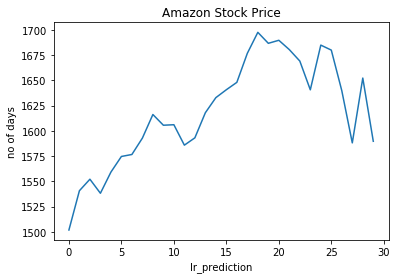

In [22]:
x = lr_prediction
y = range(n_forecast)
plt.plot(y,x)
plt.xlabel('lr_prediction')
plt.ylabel('no of days')
plt.title('Amazon Stock Price')
plt.show()